In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd

sys.path.append('../')

import scripts.visualization as viz
from scripts.data_utils import load_results

viz.load_matplotlib()
plt = viz.plt

# Large network

## Parameters


- $\beta$ = {0.01, ..., 0.99}
- $\gamma$ = 0.5
- $\mu$ = 0.9
- $\kappa$ = 0.05
- max_infected_time = 10
- NSTEPS = 200 000
- NAGENTS = 10 000
- n_runs = 1 (only one realization !!)


Variants (fA - fraction of agents which has an illness A, fB - fraction of agents which has illness B):

1. fA = 0, fB = 0 (done)
2. fA = 0.1, fB = 0.1 (done)
3. fA = 0, fB = 0.5 (done)
4. fA = 0.5, fB = 0 (done)
5. fA = 0.5, fB = 0.5 (done)
6. fA = 1.0, fB = 1.0 (done)

In [20]:
def load_res(variant, fA, fB):
    dr_path = f"../data/new_experiments/singlelayer/beta_gamma/dead_ratio_beta_gamma_v{variant}_L1-None_FRAC_A={fA}_FRAC_B={fB}_NRUNS=1_NSTEPS=200000_NAGENTS=10000.csv"
    ir_path = f"../data/new_experiments/singlelayer/beta_gamma/infected_ratio_beta_gamma_v{variant}_L1-None_FRAC_A={fA}_FRAC_B={fB}_NRUNS=1_NSTEPS=200000_NAGENTS=10000.csv"
    dr_df = pd.read_csv(dr_path, index_col=0)
    dr_df.columns = ['gamma']
    ir_df = pd.read_csv(ir_path, index_col=0)
    ir_df.columns = ['gamma']
    return dr_df, ir_df
    
dr1, ir1 = load_res(1, 0, 0)
dr2, ir2 = load_res(2, 0.1, 0.1)
dr3, ir3 = load_res(3, 0.0, 0.5)
dr4, ir4 = load_res(4, 0.5, 0.0)
dr5, ir5 = load_res(5, 0.5, 0.5)
dr6, ir6 = load_res(6, 1.0, 1.0)

In [13]:
colors = ['red', 'green', 'blue', 'black', 'yellow', 'violet']
colors = ['xkcd:' + c for c in colors]
markers = ['o', 's', 'v', '^', 'X', 'P', 'D']
markersize = 6

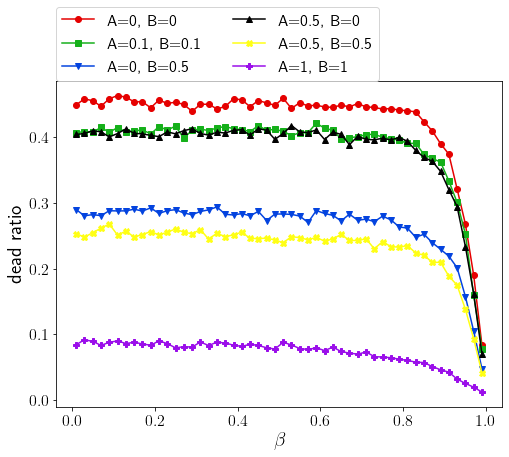

In [33]:
labels = ['A={}, B={}'.format(x, y) for x, y in [(0, 0), (0.1, 0.1), (0, 0.5), (0.5, 0), (0.5, 0.5), (1, 1)]]

betas = [float(x) for x in dr1.index]

ys = [dr1, dr2, dr3, dr4, dr5, dr6]

for i, y in enumerate(ys):
    plt.plot(betas, y['gamma'], color=colors[i], label=labels[i], marker=markers[i],
             markersize=markersize)

plt.ylabel('dead ratio', fontsize=20)
plt.xlabel(r'$\beta$', fontsize=20)
plt.legend(loc=(0, 1), ncol=2)

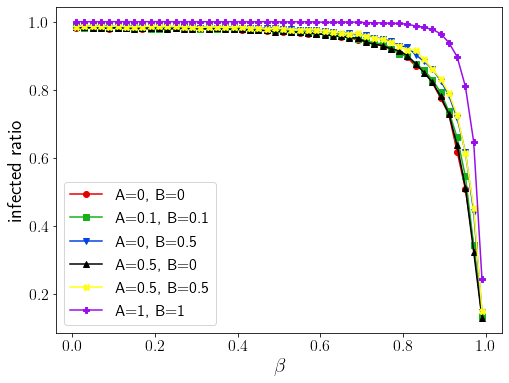

In [35]:
ys = [ir1, ir2, ir3, ir4, ir5, ir6]

for i, y in enumerate(ys):
    plt.plot(betas, y['gamma'], color=colors[i], label=labels[i], marker=markers[i],
             markersize=markersize)

plt.ylabel('infected ratio', fontsize=20)
plt.xlabel(r'$\beta$', fontsize=20)
plt.legend()